# **Importing libraries**

In [2]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# **Reading data**

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# **Descriptive statistics**

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# **Encoding data**

In [6]:
# incode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# **Standardizing features**

In [7]:
# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
Y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(X_pca)

[[ 2.78540772  1.11380852  1.44238865 ... -0.74603431 -0.3912945
   0.31009524]
 [-0.36823594 -0.26547481 -0.08223904 ... -1.56300726  1.3057395
  -0.67142183]
 [-0.04576095  0.47239003 -0.20330488 ...  0.1339401  -0.87513994
   0.43287804]
 ...
 [ 0.73012021  0.48010593  0.16862894 ...  0.16522359 -0.18870813
  -0.93907164]
 [-0.31707912 -2.06843634  0.62283157 ...  0.35821488  0.25738714
   1.28056312]
 [-0.38583083 -0.26039515 -0.22132652 ... -1.49091054  0.48073339
  -1.03019708]]


# **Building Model**

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.25, random_state=1)

# Initializing and training the XGBoost model
model = XGBClassifier(random_state=1)
model.fit(X_train, Y_train)

# Making predictions
Y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy of model: {accuracy:.4f}')
print(f'Classification Report of model:\n{classification_report(Y_test, Y_pred)}')


Accuracy of model: 0.9675
Classification Report of model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22849
           1       0.94      0.67      0.78      2151

    accuracy                           0.97     25000
   macro avg       0.95      0.83      0.88     25000
weighted avg       0.97      0.97      0.96     25000



# **Confusion matrix**

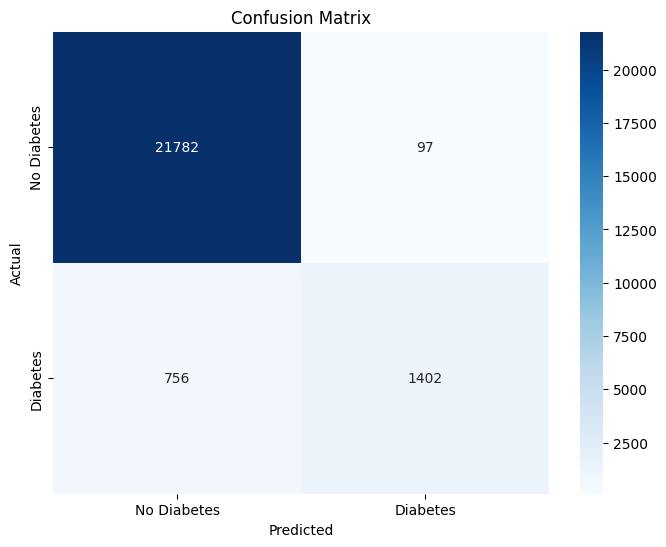

In [38]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Save Model**

In [9]:
import pickle

# Save the model
with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# **Predicting for Custom dataset CLI**

In [10]:
custom_data=[]
name=[]

n=int(input("Enter no. of patients: "))
for i in range(n):
  l=[]
  val=input("Enter name :")
  name.append(val)
  val=int(input("Enter gender (male(1)/female(0)) :"))
  l.append(val)
  val=int(input("Enter Age :"))
  l.append(val)
  val=int(input("Suffering from Hypertension (Yes(1)/No(0)) :"))
  l.append(val)
  val=int(input("Suffering from Heart Disease (Yes(1)/No(0)) :"))
  l.append(val)
  val=int(input("Smoking History (Yes(1)/No(0)) :"))
  l.append(val)
  val=float(input("BMI :"))
  l.append(val)
  val=float(input("HbA1c level :"))
  l.append(val)
  val=int(input("Glucose level :"))
  l.append(val)
  custom_data.append(l)

print(name)
print(custom_data)

  # Convert to pandas DataFrame
custom_df = pd.DataFrame(custom_data, columns=features)

  # Standardize the custom data
custom_X = scaler.transform(custom_df[features])

  # Apply PCA transformation
custom_X_pca = pca.transform(custom_X)

  # Make predictions using the trained XGBoost model
custom_predictions = model.predict(custom_X_pca)
  # print(custom_predictions)

for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(name[i]," is predicted to not have diabetes.")
    else:
        print(name[i]," is predicted to have diabetes.")


['sanhcit']
[[1, 45, 0, 0, 1, 25.6, 6.5, 150]]
sanhcit  is not predicted to have diabetes.


# **Predicting for Custom dataset GUI**

In [11]:
import tkinter as tk
from tkinter import messagebox

def submit_data():
    try:
        name = entry_name.get()

        gender = gender_var.get()
        if gender not in [0, 1]:
            raise ValueError("Gender must be selected.")

        age = int(entry_age.get())
        if not (0 <= age <= 120):
            raise ValueError("Age must be between 0 and 120.")

        hypertension = hypertension_var.get()
        if hypertension not in [0, 1]:
            raise ValueError("Hypertension must be selected.")

        heart_disease = heart_disease_var.get()
        if heart_disease not in [0, 1]:
            raise ValueError("Heart Disease must be selected.")

        smoking_history = smoking_history_var.get()
        if smoking_history not in [0, 1]:
            raise ValueError("Smoking History must be selected.")

        bmi = float(entry_bmi.get())
        if not (10 <= bmi <= 100):
            raise ValueError("BMI must be between 10 and 100.")

        hba1c = float(entry_hba1c.get())
        if not (3 <= hba1c <= 10):
            raise ValueError("HbA1c level must be between 3 and 10.")

        glucose = int(entry_glucose.get())
        if not (80 <= glucose <= 300):
            raise ValueError("Glucose level must be between 80 and 300.")

        patient_data_dict = {
        "Name": name,
        "Gender": "Male" if gender == 1 else "Female",
        "Age": age,
        "Hypertension": "Yes" if hypertension == 1 else "No",
        "Heart Disease": "Yes" if heart_disease == 1 else "No",
        "Smoking History": "Yes" if smoking_history == 1 else "No",
        "BMI": bmi,
        "HbA1c": hba1c,
        "Glucose": glucose
        }

        patient_data=[gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c,glucose]
        display_result(patient_data_dict)
        
        data_as_array=np.asarray(patient_data)
        data_as_array=data_as_array.reshape(1,-1)

          # Standardize the custom data
        custom_X = scaler.transform(data_as_array)

          # Apply PCA transformation
        custom_X_pca = pca.transform(custom_X)

          # Make predictions using the trained XGBoost model
        custom_predictions = model.predict(custom_X_pca)
        res=""
        if custom_predictions == 0:
          res=f"{patient_data_dict['Name']} is not predicted to have diabetes."
        else:
          res=f"{patient_data_dict['Name']} is predicted to have diabetes."

        result_label.config(text=res)


        if messagebox.askyesno("Continue", "Do you want to enter another patient's data?"):
            reset_form()
        else:
            root.quit()

    except ValueError as e:
        messagebox.showerror("Invalid Input", str(e))

def reset_form():
    entry_name.delete(0, tk.END)
    gender_var.set(-1)
    entry_age.delete(0, tk.END)
    hypertension_var.set(-1)
    heart_disease_var.set(-1)
    smoking_history_var.set(-1)
    entry_bmi.delete(0, tk.END)
    entry_hba1c.delete(0, tk.END)
    entry_glucose.delete(0, tk.END)
    result_label.config(text="")

def display_result(data):
    result_text = f"Name: {data['Name']}\n"
    result_text += f"Gender: {data['Gender']}\n"
    result_text += f"Age: {data['Age']}\n"
    result_text += f"Hypertension: {data['Hypertension']}\n"
    result_text += f"Heart Disease: {data['Heart Disease']}\n"
    result_text += f"Smoking History: {data['Smoking History']}\n"
    result_text += f"BMI: {data['BMI']}\n"
    result_text += f"HbA1c: {data['HbA1c']}\n"
    result_text += f"Glucose: {data['Glucose']}"
    result_label.config(text=result_text)


root = tk.Tk()
root.title("Patient Data Collection")
root.resizable(False, False)

# Create input fields for a single patient's data
tk.Label(root, text="Name:").grid(row=0, column=0, sticky="w")
entry_name = tk.Entry(root)
entry_name.grid(row=0, column=1)

# Gender
tk.Label(root, text="Gender:").grid(row=1, column=0, sticky="w")
gender_var = tk.IntVar(value=-1)
tk.Radiobutton(root, text="Male", variable=gender_var, value=1).grid(row=1, column=1, sticky="w")
tk.Radiobutton(root, text="Female", variable=gender_var, value=0).grid(row=1, column=2, sticky="w")

# Age
tk.Label(root, text="Age (0-120):").grid(row=2, column=0, sticky="w")
entry_age = tk.Entry(root)
entry_age.grid(row=2, column=1)

# Hypertension
tk.Label(root, text="Hypertension:").grid(row=3, column=0, sticky="w")
hypertension_var = tk.IntVar(value=-1)
tk.Radiobutton(root, text="Yes", variable=hypertension_var, value=1).grid(row=3, column=1, sticky="w")
tk.Radiobutton(root, text="No", variable=hypertension_var, value=0).grid(row=3, column=2, sticky="w")

# Heart Disease
tk.Label(root, text="Heart Disease:").grid(row=4, column=0, sticky="w")
heart_disease_var = tk.IntVar(value=-1)
tk.Radiobutton(root, text="Yes", variable=heart_disease_var, value=1).grid(row=4, column=1, sticky="w")
tk.Radiobutton(root, text="No", variable=heart_disease_var, value=0).grid(row=4, column=2, sticky="w")

# Smoking History
tk.Label(root, text="Smoking History:").grid(row=5, column=0, sticky="w")
smoking_history_var = tk.IntVar(value=-1)
tk.Radiobutton(root, text="Yes", variable=smoking_history_var, value=1).grid(row=5, column=1, sticky="w")
tk.Radiobutton(root, text="No", variable=smoking_history_var, value=0).grid(row=5, column=2, sticky="w")

# BMI
tk.Label(root, text="BMI (10-100):").grid(row=6, column=0, sticky="w")
entry_bmi = tk.Entry(root)
entry_bmi.grid(row=6, column=1)

# HbA1c level
tk.Label(root, text="HbA1c level (3-10):").grid(row=7, column=0, sticky="w")
entry_hba1c = tk.Entry(root)
entry_hba1c.grid(row=7, column=1)

# Glucose level
tk.Label(root, text="Glucose level (80-300):").grid(row=8, column=0, sticky="w")
entry_glucose = tk.Entry(root)
entry_glucose.grid(row=8, column=1)

# Submit button
submit_button = tk.Button(root, text="Submit Data", command=submit_data)
submit_button.grid(row=9, column=0, columnspan=3, pady=10)

# Result label
result_label = tk.Label(root, text="", justify="left")
result_label.grid(row=10, column=0, columnspan=3, pady=10)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\acer\AppData\Local\Temp\ipykernel_11944\1656004783.py", line 52, in submit_data
    display_result(patient_data)
  File "C:\Users\acer\AppData\Local\Temp\ipykernel_11944\1656004783.py", line 93, in display_result
    result_text = f"Name: {data['Name']}\n"
                           ~~~~^^^^^^^^
KeyError: 'Name'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\acer\AppData\Local\Temp\ipykernel_11944\1656004783.py", line 52, in submit_data
    display_result(pat

KeyboardInterrupt: 

: 